In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rioxr
import netCDF4
import geopandas as gpd
import contextily as ctx

In [2]:
# Eaton
eaton = gpd.read_file(os.path.join('data',
                                   'Eaton_Perimeter_20250121',
                                   'Eaton_Perimeter_20250121.shp'))

# Palisades
palisades = gpd.read_file(os.path.join('data',
                                   'Palisades_Perimeter_20250121',
                                   'Palisades_Perimeter_20250121.shp'))
# Combine fires
fires = gpd.GeoDataFrame(pd.concat([eaton, palisades]))


# Import CA EJI gdb
fp = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji_california = gpd.read_file(fp).to_crs(fires.crs)


In [3]:
# We want to look at income, % minority, 
# EP_MINRTY
# EPL_HOUBDN
# EPL_POV200
# E_RENTER

eji_palisades = gpd.sjoin(eji_california, palisades, predicate = 'intersects')
eji_eaton = gpd.sjoin(eji_california, eaton, predicate = 'intersects')



<Axes: >

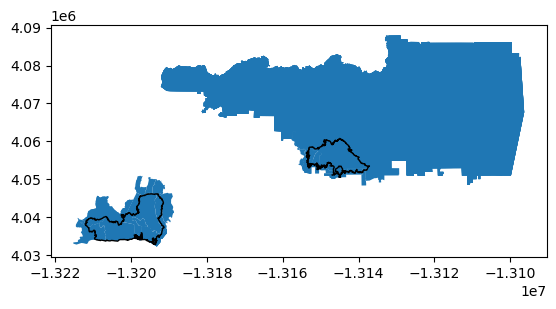

In [5]:
# Create exploratory map to

fig, ax = plt.subplots()

eji_palisades.plot(ax=ax)

eji_eaton.plot(ax=ax)

palisades.plot(ax = ax,
               color = 'none',
               edgecolor = 'black')

eaton.plot(ax = ax,
               color = 'none',
               edgecolor = 'black')


<Axes: >

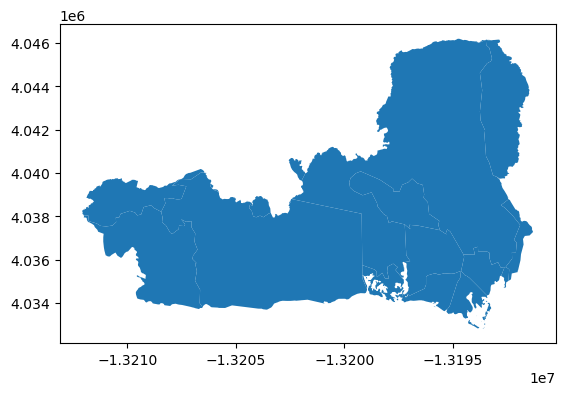

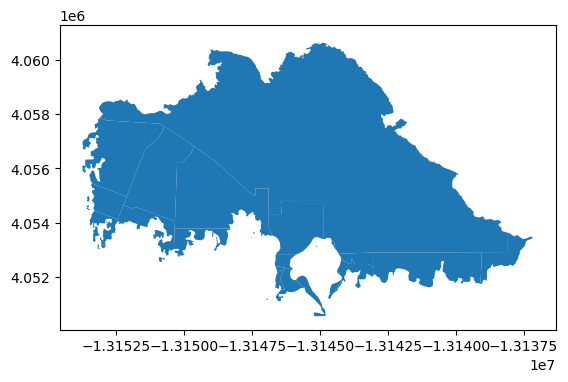

In [6]:
# Clip census tracts to fire boundaries

eji_palisades_clipped = gpd.clip(eji_california, palisades)
eji_eaton_clipped = gpd.clip(eji_california, eaton)

eji_palisades_clipped.plot()
eji_eaton_clipped.plot()

<Axes: >

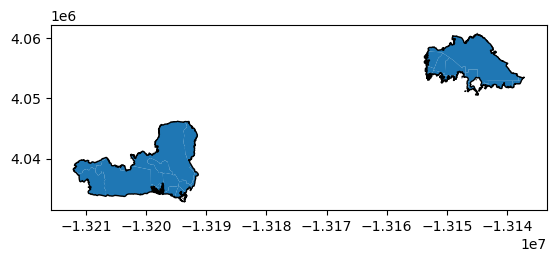

In [7]:
fig, ax = plt.subplots()

eji_palisades_clipped.plot(ax=ax)

palisades.plot(ax = ax,
               color = 'none',
               edgecolor = 'black')

eji_eaton_clipped.plot(ax=ax)

eaton.plot(ax = ax,
               color = 'none',
               edgecolor = 'black')

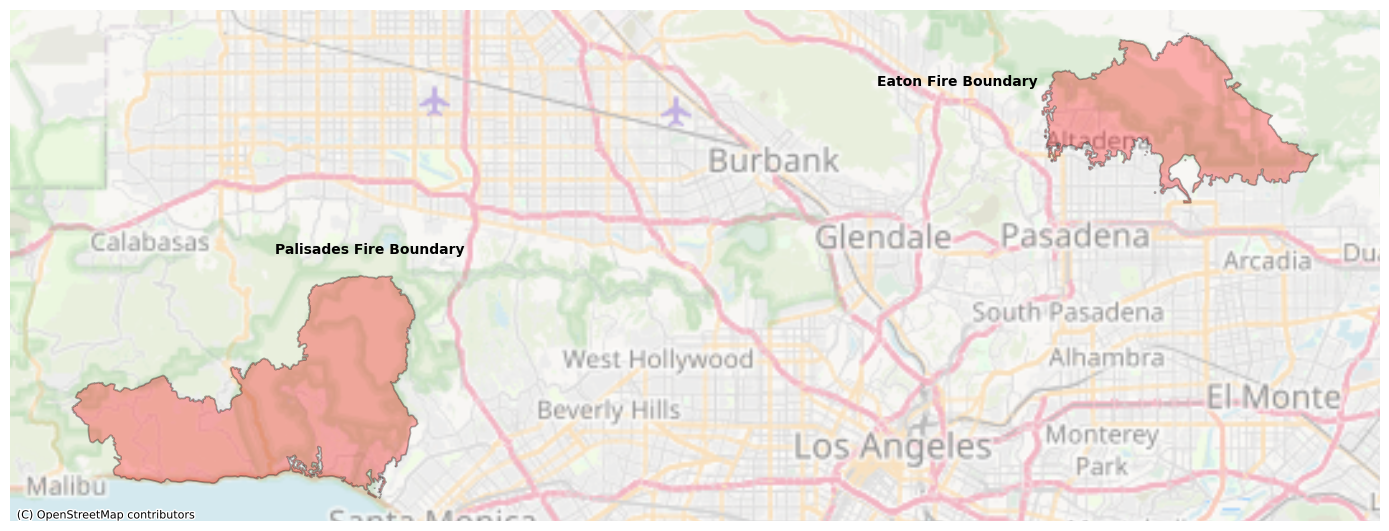

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
palisades.plot(ax =ax,
               edgecolor = 'black',
               color = 'red',
               linewidth = 1.25,
               alpha = 0.3)

eaton.plot(ax =ax,
               edgecolor = 'black',
               color = 'red',
               linewidth = 1.25,
               alpha = 0.3)

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

plt.figtext(x = .63,
            y = .65,
            s = "Eaton Fire Boundary",
            weight = 'bold')

plt.figtext(x = .2,
            y = .51,
            s = "Palisades Fire Boundary",
            weight = 'bold')




# ADD TITLE

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,
                alpha = 0.5)

ax.axis('off')

plt.tight_layout()
plt.show()




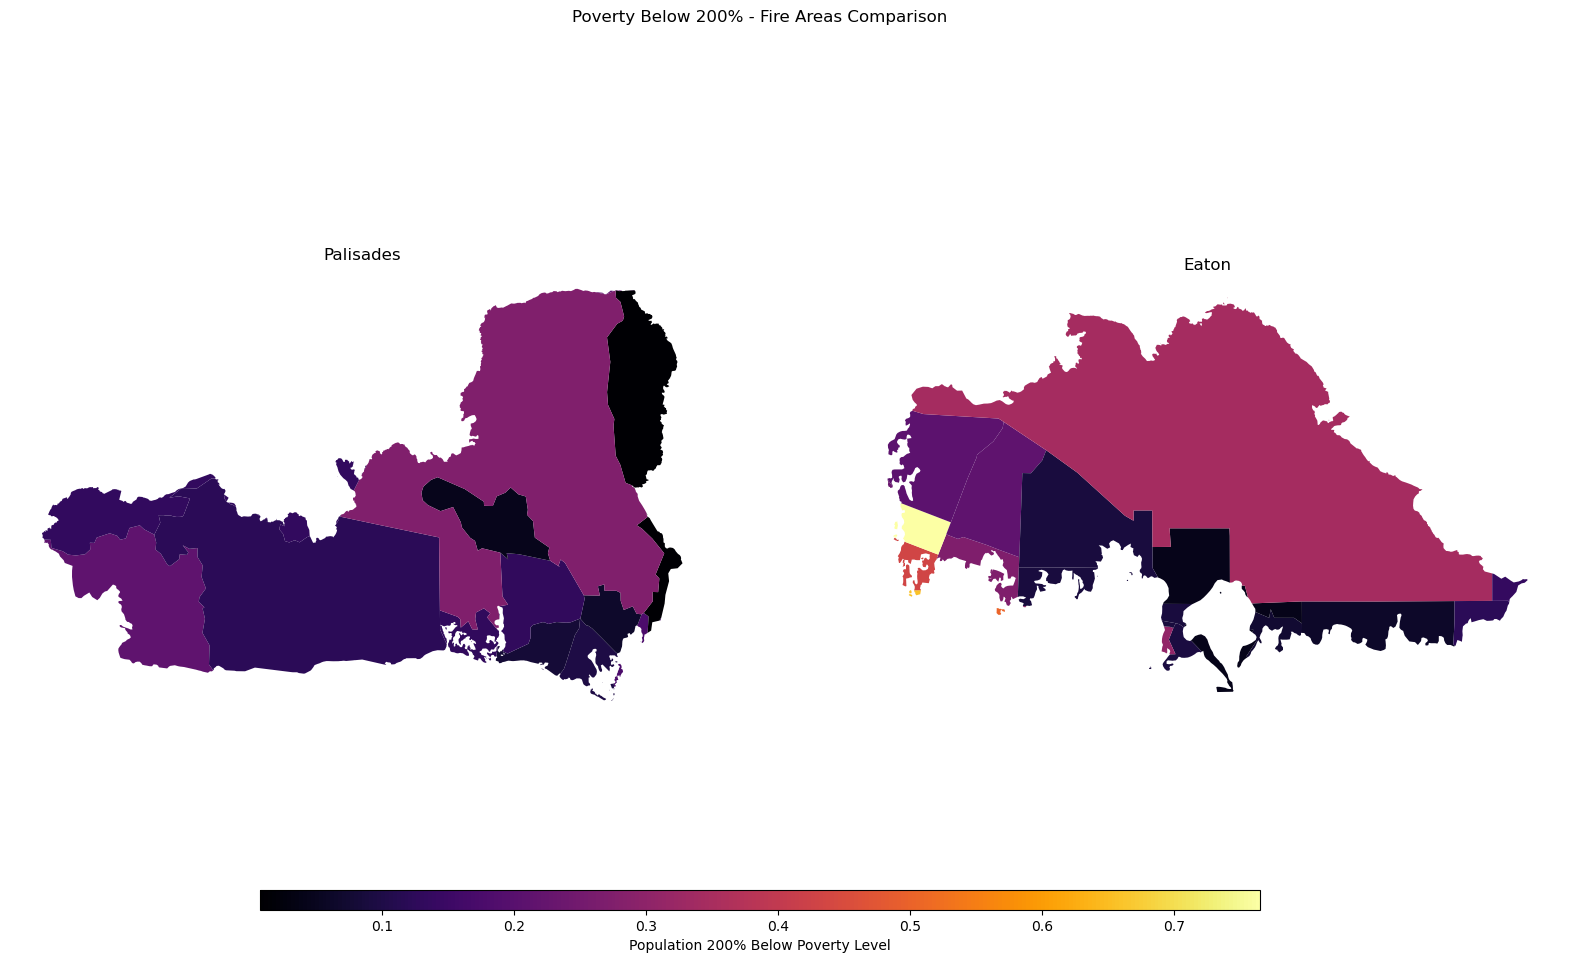

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'EPL_POV200'

# Find common min/max for legend range
vmin = min(eji_palisades_clipped[eji_variable].min(), eji_eaton_clipped[eji_variable].min())
vmax = max(eji_palisades_clipped[eji_variable].max(), eji_eaton_clipped[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_palisades_clipped.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    cmap = 'inferno'
)
ax1.set_title('Palisades')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eaton_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    cmap = 'inferno'
)
ax2.set_title('Eaton')
ax2.axis('off')

# Add overall title
fig.suptitle('Poverty Below 200% - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap = 'inferno')
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Population 200% Below Poverty Level')

plt.show()